# Условная оптимизация. Метод штрафных функций¶

Рассмотрим один из многочисленных вариантов метода штрафных функций. Задача условной оптимизации$$
   f(x) \to \min
$$при ограничениях$$
g_1(x) = 0, \dots, g_m(x) = 0, \quad
h_1(x) \le 0, \dots, h_p(x) \le 0
$$решается при помощи решения последовательности вспомогательных задач безусловной оптимизации:$$
\left(F(x) + c\sum_{i=1}^m g(h_i)^2 + c\sum_{k=1}^p \left[ h(h_k) \right]_+^2\right) \to \min,
$$где $c$ – некоторая возрастающая последовательность (например, геометрическая прогрессия), $[\alpha]_+ = \max\{0,\,\alpha\}$.
Реализуйте данный метод. Для решения задачи безусловной оптимизации воспользуйтесь функциями из библиотеки SciPy.

Проиллюстрируйте работу метода на двумерной и многомерных функциях Розенброка$$
f(x_1,x_2,\dots,x_n) = \sum_{i=1}^{n-1} \left(  (1-x_i)^2+ 100 (x_{i+1} - x_i^2 )^2 \right) 
$$с линейными и квадратичными ограничениями. Для $n=2$ изобразите найденные точки минимума на каждой итерации.

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.optimize import minimize


Основная задача метода штрафных функций заключается в преобразовании задачи по минимизации функции с ограничениями наложенными на x
$$z = f(x)$$
В задачу поиска минимума без ограничений функции
$$Z = f(x) + P(x)$$ 

Функция P(x) является штрафной. Необходимо, чтобы при нарушении ограничений она штрафовала Z (Увеличивала ее значение). В этом случае минимум функции Z будет находиться внутри области ограничений. Функция P(x), удовлетворяющая этому условию, может быть не единственной

Сначала мы будем работать с двумерной функцией Розенброка. Она будет выглядеть следующим образом:
$$f(x,y) = (1-x)^2+ 100 (y - x^2 )^2$$

Работа программы прекратится при достижении некой точности. Что можно изобразить следующим образом:
$$f(x,y) = (1-x)^2+ 100 (y - x^2 )^2 + P(x) < eps$$
eps - погрешность вычислений


Зададим функцию, ограничения и коэффициенты, которые понадобятся в будущем решении

In [2]:
x_c = [0.9, 0.9] #Начальная точка
i = 1 #Количество итераций цикла который и будет искать минимум
eps = 0.00001 #При достижении указанной в этом параметре точности останавливает работу программы
r = 1 #Служит для работы метода штрафных функций, уменьшается на каждой итерации
b = 0.5 #Константа, служит для уменьшения предыдущего параметра в b раз

h_1 = lambda x: (-x[0] + 5) #Ограничение 1
h_2 = lambda x: (-x[1] + 5) #Ограничение 2


roz = lambda x: ((1-x[0])**2) + 100*(x[1] - x[0]**2)**2 #Функция Розенброка от 2 переменных
curr_func = lambda x: roz(x) + r*(h_1(x)**2 + h_2(x)**2)

#### Ограничения:
$$x > 5$$
$$y > 5$$

Я не буду выводить все найденные с помощью метода штрафных функций точки, потому как самые первые из найденных находятся слишком далеко от минимума функции, что сделает визуальное отображение всей картины недостаточно наглядным

Программа будет выполнять свою работу столько, сколько потребуется, чтобы

Найденный минимум - [1.0000058  1.00001165]
Итераций работы программы - 23


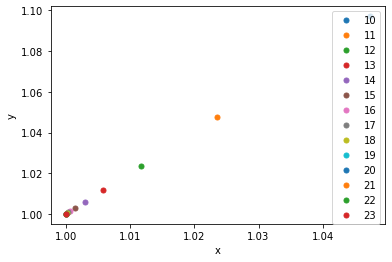

In [3]:
while i < 1000:
    if(i >= 10):
        plt.plot(x_c[0], x_c[1], 'o', markersize=5, label=i)
    if r*(max(0, h_1(x_c))**2 + max(0, h_2(x_c))**2) < eps:
        break
    curr_func = lambda x: roz(x) + r*(h_1(x)**2 + h_2(x)**2)
    x_c = minimize(curr_func, x_c).x;
    i += 1
    r  *= b;   

print("Найденный минимум - " + str(x_c))
print("Итераций работы программы - " + str(i))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

pass

### Проверим наше решение
Для чего мы используем стандартную функцию minimize, которую мы импортировали в начале. Наше решение не должно слишком сильно отличаться от решения, полученного в ходе проверки

In [4]:
roz = lambda x: ((1-x[0])**2) + (100*(x[1] - x[0]**2)**2)
h_1 = lambda x: (-x[0] + 5)
h_2 = lambda x: (-x[1] + 5)
x0 = [0.9, 0.9];

con = ({'type': 'ineq', 'fun': h_1},
       {'type': 'ineq', 'fun': h_2},) 

minimize(roz, x0, constraints=con)

     fun: 3.110925386414028e-07
     jac: array([ 0.01530499, -0.0080378 ])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.99961333, 0.9991866 ])

## Найдем минимум двумерной функции Розенброка с другими ограничениями

In [5]:
x_c = [5, 10]
i = 1
eps = 0.00001
r = 0.2
b = 1

h_1 = lambda x: (x[1]**2 + x[0]**2 - 20) #Ограничение 1
h_2 = lambda x: (x[0] + x[1] - 6) #Ограничение 2

roz = lambda x: ((1-x[0])**2) + (100*(x[1] - x[0]**2)**2)
curr_func = lambda x: roz(x) + r*(h_1(x)**2 + h_2(x)**2 + h_3(x)**2)

#### Ограничения:

$$y^2 + x^2 > 20$$
$$x + y > 6$$

Найденный минимум - [1.99570942 3.98506837]
Итераций работы программы - 2


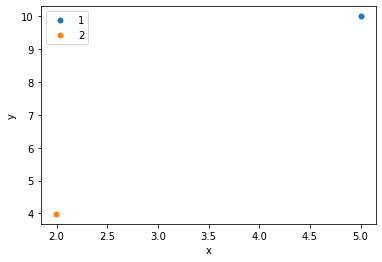

In [6]:
while i < 1000:
    if(i >= 1):
        plt.plot(x_c[0], x_c[1], 'o', markersize=5, label=i)
    if r*(max(0, h_1(x_c))**2 + max(0, h_2(x_c))**2) < eps:
        break
    curr_func = lambda x: roz(x) + r*(h_1(x)**2 + h_2(x)**2)
    x_c = minimize(curr_func, x_c).x;
    i += 1
    r  *= b;   

print("Найденный минимум - " + str(x_c))
print("Итераций работы программы - " + str(i))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

pass

In [7]:
roz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2;

h_1 = lambda x: (x[1]**2 + x[0]**2 - 20) #Ограничение 1
h_2 = lambda x: (x[0] + x[1] - 6) #Ограничение 2
h_3 = lambda x: (x[1]**2 - 5) #Ограничение 3
x_c = [5, 10];

con = ({'type': 'ineq', 'fun': h_1},
       {'type': 'ineq', 'fun': h_2},
       {'type': 'ineq', 'fun': h_3}) 

minimize(roz, x_c, constraints=con)

     fun: 0.9996000960030997
     jac: array([0.40019053, 0.39983983])
 message: 'Optimization terminated successfully'
    nfev: 34
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([1.99960013, 4.00039987])

## Найдем минимум трехмерной функции Розенброка с другими ограничениями

Трехмерная функция Розенброка (функция от трех переменных) будет выглядеть следующим образом:
$$f(x,y) = (1-x)^2+ 100 (y - x^2 )^2 + (1-y)^2+ 100 (z - y^2 )^2$$

Остальные аспекты работы метода штрафных функций не будут меняться

In [25]:
x_c = [2, 2, 2]
i = 1
eps = 0.01
r = 0.001
b = 200


h_1 = lambda x: (x[0]**2 + 10)
h_2 = lambda x: (x[0]**2 + x[1]**2 - 200)
h_3 = lambda x: (x[2]**2 - 33)


roz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2 + (1-x[1])**2 + 100*(x[2] - x[1]**2)**2
curr_func = lambda x: rz(x) + r*(h_1(x)**2 + h_2(x)**2 + h_3(x)**2)

#### Ограничения

$$x^2 > 10$$
$$x^2 + y^2 > 200$$
$$z > 33$$

Найденный минимум - [  3.69461698  13.65100149 186.35161619]
Итераций работы программы - 10


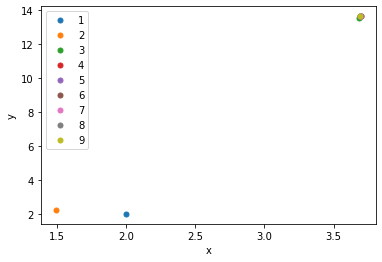

In [26]:
while i < 10:
    if(i >= 0):
        plt.plot(x_c[0], x_c[1], 'o', markersize=5, label=i)
    if r*(max(0, h_1(x_c))**2 + max(0, h_2(x_c))**2 + max(0, h_3(x_c))**2) < eps:
        break
    curr_func = lambda x: roz(x) + r*(min(0, h_1(x))**2 + min(0, h_2(x))**2 + min(0, h_3(x))**2)
    x_c = minimize(curr_func, x_c).x;
    i += 1
    r  *= b;   

print("Найденный минимум - " + str(x_c))
print("Итераций работы программы - " + str(i))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

pass

In [11]:
roz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2 + (1-x[1])**2 + 100*(x[2] - x[1]**2)**2

h_1 = lambda x: (x[0]**2 + 10)
h_2 = lambda x: (x[0]**2 + x[1]**2 - 200)
h_3 = lambda x: (x[2]**2 - 33)

x_c = [2, 2, 2]

con = ({'type': 'ineq', 'fun': h_1},
       {'type': 'ineq', 'fun': h_2},
       {'type': 'ineq', 'fun': h_3}) 

minimize(roz, x_c, constraints=con)

     fun: 167.30852189325915
     jac: array([6.78297615e+00, 2.48634968e+01, 9.19342041e-03])
 message: 'Optimization terminated successfully'
    nfev: 71
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([  3.6948452 ,  13.65093839, 186.3481649 ])

## Вывод

Метод штрафных функций может быть использован для решения задач оптимизации, чтобы найти минимальное значение функции. Как уже было расписано выше, суть этого метода заключается в так называемом "наложении штрафа" на функцию, если она начинает выходить за определенные значения. Таким образом получается решать не задачу по минимизации функции с ограничениями, а задачу поиска минимума без ограничений функции. Притом, насколько я могу судить, подобный вариант нахождения минимума функции для некоторых случаев может быть удобнее, чем применение стандартного minimize
